In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv('Train-Set.csv')
train

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,56963,31963,47,blue-collar,married,basic.9y,no,NaN,no,yes,cellular,apr,fri,583,2,999,1,failure,no
1,31753,21378,48,management,divorced,tertiary,no,351.0,yes,no,cellular,7,apr,725,3,-1,0,unknown,no
2,60854,17084,38,technician,single,high.school,no,NaN,no,no,cellular,aug,wed,74,2,999,0,nonexistent,no
3,34207,81693,50,management,divorced,tertiary,no,1270.0,yes,no,cellular,4,may,24,3,-1,0,unknown,no
4,73066,63978,54,self-employed,married,high.school,no,NaN,yes,yes,cellular,aug,thu,904,3,999,0,nonexistent,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54707,21243,38468,35,management,married,tertiary,no,750.0,yes,no,cellular,18,aug,233,12,-1,0,unknown,no
54708,45891,4378,31,services,married,high.school,no,NaN,no,no,telephone,may,wed,636,6,999,0,nonexistent,no
54709,42613,65128,35,management,married,tertiary,no,323.0,no,no,cellular,11,jan,261,2,-1,0,unknown,yes
54710,43567,782,70,retired,married,secondary,no,616.0,no,no,cellular,27,apr,149,2,182,1,failure,no


In [3]:
test = pd.read_csv('Test-Set.csv')
test

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,45247,74249,34,admin.,married,university.degree,no,NaN,no,no,cellular,jul,wed,266,1,999,0,nonexistent
1,19894,35779,31,management,single,tertiary,no,165.0,no,yes,cellular,8,aug,523,2,-1,0,unknown
2,70048,66769,28,blue-collar,single,basic.9y,no,NaN,no,no,telephone,may,fri,489,2,999,0,nonexistent
3,24241,27888,57,admin.,divorced,secondary,no,1878.0,yes,no,cellular,17,nov,219,1,-1,0,unknown
4,20495,63306,55,management,divorced,tertiary,no,277.0,no,no,cellular,12,aug,101,3,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23444,62765,902,36,blue-collar,married,basic.6y,no,NaN,no,no,telephone,may,fri,203,5,999,0,nonexistent
23445,28615,39745,44,services,married,secondary,no,133.0,no,no,cellular,29,jan,202,3,-1,0,unknown
23446,55510,40150,31,blue-collar,married,basic.9y,no,NaN,yes,no,cellular,jul,wed,590,1,999,0,nonexistent
23447,53035,6012,43,management,divorced,high.school,no,NaN,yes,no,cellular,nov,mon,488,2,999,0,nonexistent


In [4]:
# We need to check missing values in dataset
train.isnull().sum()

Unnamed: 0        0
id                0
age               0
job               0
marital           0
education         0
default           0
balance       22870
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
Target            0
dtype: int64

In [5]:
test.isnull().sum()

Unnamed: 0        0
id                0
age               0
job               0
marital           0
education         0
default           0
balance       10080
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54712 entries, 0 to 54711
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  54712 non-null  int64  
 1   id          54712 non-null  int64  
 2   age         54712 non-null  int64  
 3   job         54712 non-null  object 
 4   marital     54712 non-null  object 
 5   education   54712 non-null  object 
 6   default     54712 non-null  object 
 7   balance     31842 non-null  float64
 8   housing     54712 non-null  object 
 9   loan        54712 non-null  object 
 10  contact     54712 non-null  object 
 11  day         54712 non-null  object 
 12  month       54712 non-null  object 
 13  duration    54712 non-null  int64  
 14  campaign    54712 non-null  int64  
 15  pdays       54712 non-null  int64  
 16  previous    54712 non-null  int64  
 17  poutcome    54712 non-null  object 
 18  Target      54712 non-null  object 
dtypes: float64(1), int64(7), 

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23449 entries, 0 to 23448
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  23449 non-null  int64  
 1   id          23449 non-null  int64  
 2   age         23449 non-null  int64  
 3   job         23449 non-null  object 
 4   marital     23449 non-null  object 
 5   education   23449 non-null  object 
 6   default     23449 non-null  object 
 7   balance     13369 non-null  float64
 8   housing     23449 non-null  object 
 9   loan        23449 non-null  object 
 10  contact     23449 non-null  object 
 11  day         23449 non-null  object 
 12  month       23449 non-null  object 
 13  duration    23449 non-null  int64  
 14  campaign    23449 non-null  int64  
 15  pdays       23449 non-null  int64  
 16  previous    23449 non-null  int64  
 17  poutcome    23449 non-null  object 
dtypes: float64(1), int64(7), object(10)
memory usage: 3.2+ MB


In [8]:
# To check duplicated values 
train.duplicated().value_counts()

False    54712
dtype: int64

In [9]:
test.duplicated().value_counts()

False    23449
dtype: int64

In [10]:
train.drop(columns=['Unnamed: 0','id','pdays','balance'],inplace=True)

In [11]:
test.drop(columns=['Unnamed: 0','pdays','balance'],inplace=True)

In [12]:
test.dtypes

id            int64
age           int64
job          object
marital      object
education    object
default      object
housing      object
loan         object
contact      object
day          object
month        object
duration      int64
campaign      int64
previous      int64
poutcome     object
dtype: object

In [13]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,54712.0,40.580147,10.544504,17.0,32.0,39.0,48.0,98.0
duration,54712.0,257.282260,255.270335,0.0,103.0,180.0,318.0,4199.0
campaign,54712.0,2.679961,2.966822,1.0,1.0,2.0,3.0,58.0
previous,54712.0,0.407351,1.520253,0.0,0.0,0.0,0.0,58.0


In [14]:
test.describe(include="object").T

,count,unique,top,freq
job,23449,12,blue-collar,5131
marital,23449,4,married,14072
education,23449,11,secondary,6845
default,23449,3,no,21035
housing,23449,3,yes,12718
loan,23449,3,no,19534
contact,23449,3,cellular,15059
day,23449,41,may,3375
month,23449,17,may,4115
poutcome,23449,5,unknown,10902


In [15]:
for index, row in train.iterrows():
    if row['day'] in train['month'].values:
        train.at[index, 'month'] = row['day']

In [16]:
train

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,previous,poutcome,Target
0,47,blue-collar,married,basic.9y,no,no,yes,cellular,apr,apr,583,2,1,failure,no
1,48,management,divorced,tertiary,no,yes,no,cellular,7,apr,725,3,0,unknown,no
2,38,technician,single,high.school,no,no,no,cellular,aug,aug,74,2,0,nonexistent,no
3,50,management,divorced,tertiary,no,yes,no,cellular,4,may,24,3,0,unknown,no
4,54,self-employed,married,high.school,no,yes,yes,cellular,aug,aug,904,3,0,nonexistent,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54707,35,management,married,tertiary,no,yes,no,cellular,18,aug,233,12,0,unknown,no
54708,31,services,married,high.school,no,no,no,telephone,may,may,636,6,0,nonexistent,no
54709,35,management,married,tertiary,no,no,no,cellular,11,jan,261,2,0,unknown,yes
54710,70,retired,married,secondary,no,no,no,cellular,27,apr,149,2,1,failure,no


In [17]:
for index, row in test.iterrows():
    if row['day'] in test['month'].values:
        test.at[index, 'month'] = row['day']

In [18]:
test

,id,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,74249,34,admin.,married,university.degree,no,no,no,cellular,jul,jul,266,1,0,nonexistent
1,35779,31,management,single,tertiary,no,no,yes,cellular,8,aug,523,2,0,unknown
2,66769,28,blue-collar,single,basic.9y,no,no,no,telephone,may,may,489,2,0,nonexistent
3,27888,57,admin.,divorced,secondary,no,yes,no,cellular,17,nov,219,1,0,unknown
4,63306,55,management,divorced,tertiary,no,no,no,cellular,12,aug,101,3,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23444,902,36,blue-collar,married,basic.6y,no,no,no,telephone,may,may,203,5,0,nonexistent
23445,39745,44,services,married,secondary,no,no,no,cellular,29,jan,202,3,0,unknown
23446,40150,31,blue-collar,married,basic.9y,no,yes,no,cellular,jul,jul,590,1,0,nonexistent
23447,6012,43,management,divorced,high.school,no,yes,no,cellular,nov,nov,488,2,0,nonexistent


In [19]:
train.drop(columns=['day'],inplace=True)
train

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,previous,poutcome,Target
0,47,blue-collar,married,basic.9y,no,no,yes,cellular,apr,583,2,1,failure,no
1,48,management,divorced,tertiary,no,yes,no,cellular,apr,725,3,0,unknown,no
2,38,technician,single,high.school,no,no,no,cellular,aug,74,2,0,nonexistent,no
3,50,management,divorced,tertiary,no,yes,no,cellular,may,24,3,0,unknown,no
4,54,self-employed,married,high.school,no,yes,yes,cellular,aug,904,3,0,nonexistent,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54707,35,management,married,tertiary,no,yes,no,cellular,aug,233,12,0,unknown,no
54708,31,services,married,high.school,no,no,no,telephone,may,636,6,0,nonexistent,no
54709,35,management,married,tertiary,no,no,no,cellular,jan,261,2,0,unknown,yes
54710,70,retired,married,secondary,no,no,no,cellular,apr,149,2,1,failure,no


In [20]:
test.drop(columns=['day'],inplace=True)
test

,id,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,previous,poutcome
0,74249,34,admin.,married,university.degree,no,no,no,cellular,jul,266,1,0,nonexistent
1,35779,31,management,single,tertiary,no,no,yes,cellular,aug,523,2,0,unknown
2,66769,28,blue-collar,single,basic.9y,no,no,no,telephone,may,489,2,0,nonexistent
3,27888,57,admin.,divorced,secondary,no,yes,no,cellular,nov,219,1,0,unknown
4,63306,55,management,divorced,tertiary,no,no,no,cellular,aug,101,3,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23444,902,36,blue-collar,married,basic.6y,no,no,no,telephone,may,203,5,0,nonexistent
23445,39745,44,services,married,secondary,no,no,no,cellular,jan,202,3,0,unknown
23446,40150,31,blue-collar,married,basic.9y,no,yes,no,cellular,jul,590,1,0,nonexistent
23447,6012,43,management,divorced,high.school,no,yes,no,cellular,nov,488,2,0,nonexistent


In [21]:
le = LabelEncoder()

train[['job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'poutcome',
    'Target']]=train[['job',
                   'marital',
                   'education',
                   'default',
                   'housing',
                   'loan',
                   'contact',
                   'month',
                   'poutcome',
                   'Target']].apply(le.fit_transform)

In [22]:
test[['job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'poutcome']]=test[['job',
                   'marital',
                   'education',
                   'default',
                   'housing',
                   'loan',
                   'contact',
                   'month',
                   'poutcome']].apply(le.fit_transform)

In [23]:
train

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,previous,poutcome,Target
0,47,1,1,2,0,0,2,0,0,583,2,1,0,0
1,48,4,0,8,0,2,0,0,0,725,3,0,4,0
2,38,9,2,3,0,0,0,0,1,74,2,0,1,0
3,50,4,0,8,0,2,0,0,8,24,3,0,4,0
4,54,6,1,3,0,2,2,0,1,904,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54707,35,4,1,8,0,2,0,0,1,233,12,0,4,0
54708,31,7,1,3,0,0,0,1,8,636,6,0,1,0
54709,35,4,1,8,0,0,0,0,4,261,2,0,4,1
54710,70,5,1,7,0,0,0,0,0,149,2,1,0,0


In [24]:
test

,id,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,previous,poutcome
0,74249,34,0,1,9,0,0,0,0,5,266,1,0,1
1,35779,31,4,2,8,0,0,2,0,1,523,2,0,4
2,66769,28,1,2,2,0,0,0,1,8,489,2,0,1
3,27888,57,0,0,7,0,2,0,0,9,219,1,0,4
4,63306,55,4,0,8,0,0,0,0,1,101,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23444,902,36,1,1,1,0,0,0,1,8,203,5,0,1
23445,39745,44,7,1,7,0,0,0,0,4,202,3,0,4
23446,40150,31,1,1,2,0,2,0,0,5,590,1,0,1
23447,6012,43,4,0,3,0,2,0,0,9,488,2,0,1


In [25]:
# feature variables
x= train.iloc[:, :-1]

# target variable
y= train.iloc[:, -1]

<AxesSubplot:>

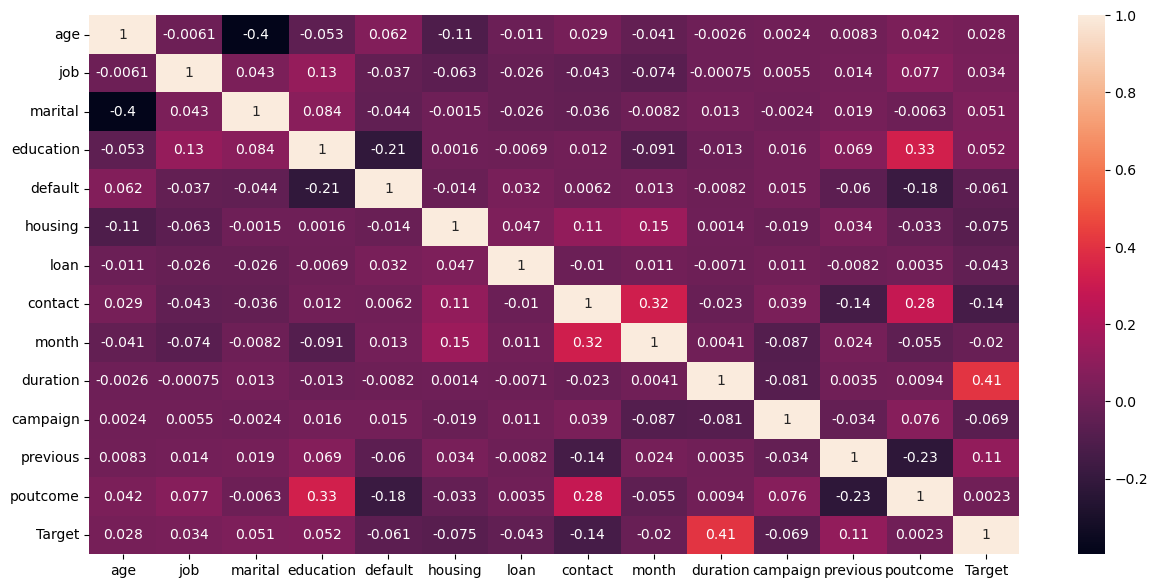

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(train.corr(), annot=True)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split (x, y, test_size= 0.3, random_state= 42)

In [29]:
from imblearn.over_sampling import SMOTE


# Initialize SMOTE for oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Perform oversampling using SMOTE
x_smote, y_smote = smote.fit_resample(X_train, y_train)

In [30]:
x_smote

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,previous,poutcome
0,39,7,1,8,0,0,0,0,3,912,3,0,4
1,42,4,1,7,0,0,0,2,8,234,4,0,4
2,34,1,1,5,0,2,0,2,8,713,4,0,4
3,44,0,2,7,0,2,0,0,2,360,2,5,3
4,42,1,1,5,0,2,0,2,6,43,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67829,34,3,2,7,0,0,0,0,2,737,1,2,2
67830,28,3,2,7,0,0,0,0,2,274,1,0,3
67831,29,8,2,3,0,0,0,0,8,226,2,1,3
67832,37,4,1,8,0,1,0,0,2,289,1,3,2


In [31]:
y_smote.value_counts()

1    33917
0    33917
Name: Target, dtype: int64

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

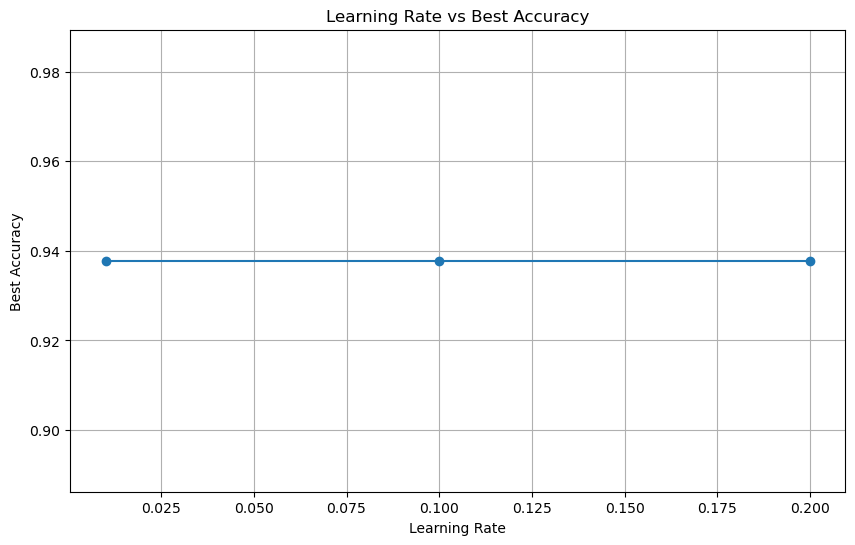

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Assuming x_smote, y_smote, X_train, y_train are defined

# Initialize StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define accuracy as a scorer
accuracy_scorer = make_scorer(accuracy_score)

# Define parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
}

# Initialize lists to store learning rates and corresponding accuracies
learning_rates = [0.01, 0.1, 0.2]
learning_rate_accuracies = []

# Iterate through each learning rate
for learning_rate in learning_rates:
    classifier = XGBClassifier(learning_rate=learning_rate)
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring=accuracy_scorer, cv=cv)
    
    # Perform grid search with cross-validation
    grid_search.fit(x_smote, y_smote)
    
    # Append the best accuracy to the list
    learning_rate_accuracies.append(grid_search.best_score_)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, learning_rate_accuracies, marker='o')
plt.title('Learning Rate vs Best Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Best Accuracy')
plt.grid(True)
plt.show()


In [54]:
f1_score(y_test,y_pred)

0.5759658686892629

Iteration 1 F1-Score: 93.68%
Iteration 2 F1-Score: 93.80%
Iteration 3 F1-Score: 93.83%
Iteration 4 F1-Score: 93.92%
Iteration 5 F1-Score: 93.66%


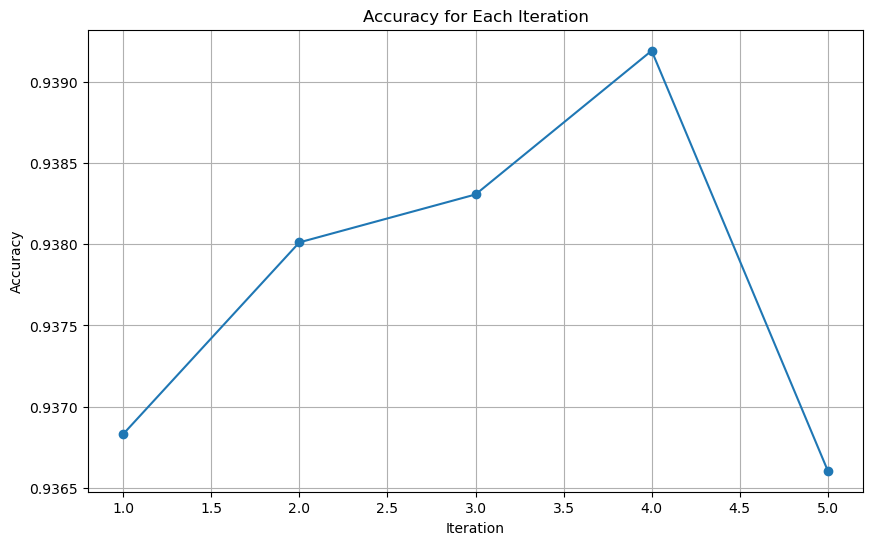

Classification Report for Best Classifier:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     14516
           1       0.53      0.60      0.57      1898

    accuracy                           0.89     16414
   macro avg       0.74      0.77      0.75     16414
weighted avg       0.90      0.89      0.90     16414



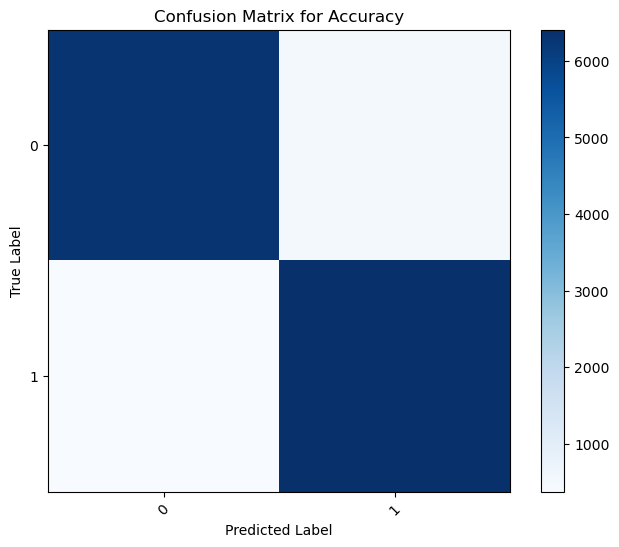

Best Parameters from Grid Search: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.model_selection import StratifiedKFold

# Assuming x_smote, y_smote, X_test, y_test, X_train, y_train are defined

# Initialize StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
}

# Initialize XGBoost classifier
classifier = XGBClassifier()

# Initialize lists to store results
iteration_accuracies = []
f1_scores = []
conf_matrices = []

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy', cv=cv)
grid_search.fit(x_smote, y_smote)

# Get the best estimator from grid search
best_classifier = grid_search.best_estimator_

# Iterate through cross-validation iterations
for train_idx, val_idx in cv.split(x_smote,y_smote):
    X_cv_train, X_cv_val = x_smote.iloc[train_idx], x_smote.iloc[val_idx]
    y_cv_train, y_cv_val = y_smote.iloc[train_idx], y_smote.iloc[val_idx]
    
    # Train the classifier
    best_classifier.fit(X_cv_train, y_cv_train)
    
    # Predictions on validation set
    y_cv_pred = best_classifier.predict(X_cv_val)
    
    # Calculate and store iteration accuracy
    iteration_accuracy = accuracy_score(y_cv_val, y_cv_pred)
    iteration_accuracies.append(iteration_accuracy)
    
    # Calculate and store confusion matrix
    conf_matrix = confusion_matrix(y_cv_val, y_cv_pred)
    conf_matrices.append(conf_matrix)
    
    # Calculate and store F1-score
    f1 = f1_score(y_cv_val, y_cv_pred, average='weighted')
    f1_scores.append(f1)

# Print F1-scores for each iteration
for i, f1 in enumerate(f1_scores):
    print(f"Iteration {i + 1} F1-Score: {f1 * 100:.2f}%")

# Plotting the accuracy for each iteration
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(iteration_accuracies) + 1), iteration_accuracies, marker='o')
plt.title('Accuracy for Each Iteration')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Print the classification report for the best classifier
y_pred_test = best_classifier.predict(X_test)
class_report = classification_report(y_test, y_pred_test)
print("Classification Report for Best Classifier:")
print(class_report)
classes = ['0', '1']
# Plotting the confusion matrix for accuracy
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrices[-1], interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Accuracy')
plt.colorbar()
plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print best parameters from grid search
best_params = grid_search.best_params_
print("Best Parameters from Grid Search:", best_params)


In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
}

grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_classifier = grid_search.best_estimator_

In [50]:
best_classifier

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[13410  1106]
 [  683  1215]]


In [51]:
best_params

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}

In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.model_selection import cross_val_score
model_comparison={}
classifier = XGBClassifier()
classifier.fit(x_smote, y_smote)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Xg Boost']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 89.10%
Model F1-Score : 88.63%
Cross Val Accuracy: 90.70 %
Cross Val Standard Deviation: 0.26 %
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     14093
           1       0.64      0.52      0.58      2321

    accuracy                           0.89     16414
   macro avg       0.78      0.74      0.76     16414
weighted avg       0.88      0.89      0.89     16414



In [33]:


# random forest
rf= RandomForestClassifier()

rf_param= { 
           "n_estimators": [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
           "max_features": ["auto", "sqrt", "log2"],
#            "max_depth": [4,5,6,7,8],
           "max_depth": [int(x) for x in np.linspace(start=5, stop=30, num=6)],
           "min_samples_split": [5,10,15,100],
           "min_samples_leaf": [1,2,5,10],
           "criterion":['gini', 'entropy'] 
          }

cv_rf= StratifiedKFold(n_splits=5)

randomsearch_rf= RandomizedSearchCV(rf, rf_param, cv=cv_rf, scoring= "f1_macro", n_jobs=-1, verbose=2, n_iter=10)

randomsearch_rf.fit(x_smote, y_smote)

print("best score is:", randomsearch_rf.best_score_)
print("best parameters are:", randomsearch_rf.best_params_)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [ ]:
# checking model performance
y_predicted_rf= randomsearch_rf.predict(X_test)

print(confusion_matrix(y_test, y_predicted_rf))
sns.heatmap(confusion_matrix(y_test, y_predicted_rf), annot=True)
print(accuracy_score(y_test, y_predicted_rf))
print(classification_report(y_test, y_predicted_rf))

In [ ]:
plot_1 = plot_confusion_matrix(logmodel, X_test ,y_predicted_rf, display_labels=["NO","YES"],cmap = plt.cm.Reds,values_format = '.2f')
plot_1.figure_.suptitle("Confusion Matrix")
plt.show()

In [ ]:


# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve



In [ ]:
# 1 MLM Logistic Regression
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(x_smote, y_smote)
prediction_1 = logmodel.predict(X_test)

In [ ]:
# Score report
print(classification_report(y_test,prediction_1))

In [ ]:
plot_1 = plot_confusion_matrix(logmodel, X_test ,y_test, display_labels=["NO","YES"],cmap = plt.cm.Reds,values_format = '.2f')
plot_1.figure_.suptitle("Confusion Matrix")
plt.show()

In [ ]:
# 2 MLM Decision tree
clf = DecisionTreeClassifier(max_depth = 10, random_state = 40)
clf.fit(x_smote, y_smote)
prediction_2 = clf.predict(X_test)

In [ ]:
print(classification_report(y_test,prediction_1))

In [ ]:
plot_1 = plot_confusion_matrix(logmodel, X_test ,y_test, display_labels=["NO","YES"],cmap = plt.cm.Reds,values_format = '.2f')
plot_1.figure_.suptitle("Confusion Matrix")
plt.show()

In [ ]:


# 3 MLM KNN
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(x_smote, y_smote)
prediction_3 = knn.predict(X_test)



In [ ]:


# Score report
print(classification_report(y_test,prediction_3))



In [ ]:
# Plot
plot_3 = plot_confusion_matrix(knn, X_test, y_test, display_labels =["NO","YES"], cmap = plt.cm.Reds, values_format = '.2f')
plot_3.figure_.suptitle("Confusion Matrix")
plt.show()

In [ ]:
# ROC plot
classifiers = [logmodel, clf, knn]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

In [37]:
wanted_test_columns= test.drop('id',axis=1)

In [38]:
wanted_test_columns

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,previous,poutcome
0,34,0,1,9,0,0,0,0,5,266,1,0,1
1,31,4,2,8,0,0,2,0,1,523,2,0,4
2,28,1,2,2,0,0,0,1,8,489,2,0,1
3,57,0,0,7,0,2,0,0,9,219,1,0,4
4,55,4,0,8,0,0,0,0,1,101,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23444,36,1,1,1,0,0,0,1,8,203,5,0,1
23445,44,7,1,7,0,0,0,0,4,202,3,0,4
23446,31,1,1,2,0,2,0,0,5,590,1,0,1
23447,43,4,0,3,0,2,0,0,9,488,2,0,1


In [43]:
y_pred_test = classifier.predict(wanted_test_columns)

In [44]:
y_pred_test[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [45]:
submission =pd.read_csv('Sample_Submition.csv')
submission

,id,Target
0,74249,0.5
1,35779,0.5
2,66769,0.5
3,27888,0.5
4,63306,0.5
...,...,...
23444,902,0.5
23445,39745,0.5
23446,40150,0.5
23447,6012,0.5


In [46]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['id'] = test['id']
submission['Target'] =y_pred_test # our model predictions on the test dataset
submission

,id,Target
0,74249,0
1,35779,0
2,66769,0
3,27888,0
4,63306,0
...,...,...
23444,902,0
23445,39745,0
23446,40150,0
23447,6012,0


In [47]:
submission.to_csv('v2eman_submission58.csv', index=False)